In [1]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(ggplot2)
library("rjson")

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite



In [2]:
dataset = "dnase"
metadata = read.table("/mnt/lab_data2/anusri/chrombpnet/logs/checkpoint/JAN_02_2023/v1/model_dir_dnase_v2.csv", sep=",", header=FALSE)
colnames(metadata) = c("fold", "cell_type", "model_dir")

In [3]:
head(metadata)

,fold,cell_type,model_dir
,<chr>,<chr>,<chr>
1,fold_0,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/DNASE/ENCSR000EMT/chrombpnet_model_feb15_fold_0/
2,fold_1,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/DNASE/ENCSR000EMT/chrombpnet_model_feb15_fold_1/
3,fold_2,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/DNASE/ENCSR000EMT/chrombpnet_model_feb15_fold_2/
4,fold_3,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/DNASE/ENCSR000EMT/chrombpnet_model_feb15_fold_3/
5,fold_4,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/DNASE/ENCSR000EMT/chrombpnet_model_feb15_fold_4/
6,fold_0,K562,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/nautilus_runs_may18/K562_05.13.2022_bias_128_4_1234_0.5_fold_0/


In [14]:
# counts_peaks = list()
# counts_peaks_nonpeaks = list()
# profile_peaks = list()
# profile_peaks_nonpeaks = list(
# )
# for (i in 1:nrow(metadata)){
#         inputf = file.path(metadata[i,"model_dir"], "chrombpnet_model/chrombpnet_metrics.json")
#         result <- fromJSON(file = inputf)
#         counts_peaks = append(counts_peaks, result$counts_metrics$peaks$pearsonr)
#         counts_peaks_nonpeaks = append(counts_peaks_nonpeaks, result$counts_metrics$peaks_and_nonpeaks$pearsonr)
#         profile_peaks = append(profile_peaks, result$profile_metrics$peaks$mean_norm_jsd)
#         profile_peaks_nonpeaks = append(profile_peaks_nonpeaks, result$profile_metrics$peaks_and_nonpeaks$median_norm_jsd)
    
# }

counts_peaks = list()
counts_peaks_nonpeaks = list()
profile_peaks = list()
profile_peaks_nonpeaks = list(
)
for (i in 1:nrow(metadata)){
        #print(metadata[i,"model_dir"])
        inputf = file.path(metadata[i,"model_dir"], "chrombpnet_model/chrombpnet_metrics.json")
        if (file.exists(inputf)) {
             inputf = file.path(metadata[i,"model_dir"], "chrombpnet_model/chrombpnet_metrics.json")
        } else {
             inputf = file.path(metadata[i,"model_dir"], "chrombpnet_metrics.json")
        }        
        result <- fromJSON(file = inputf)
        counts_peaks = append(counts_peaks, result$counts_metrics$peaks$pearsonr)
        counts_peaks_nonpeaks = append(counts_peaks_nonpeaks, result$counts_metrics$peaks_and_nonpeaks$pearsonr)
        profile_peaks = append(profile_peaks, result$profile_metrics$peaks$median_jsd*sqrt(log2(exp(1)))
)
        profile_peaks_nonpeaks = append(profile_peaks_nonpeaks, result$profile_metrics$peaks_and_nonpeaks$median_jsd*sqrt(log2(exp(1)))
)
    
}

In [15]:
metadata$counts_pearsonr_in_peaks = as.numeric(counts_peaks)
metadata$counts_pearsonr_in_peaks_nonpeaks = as.numeric(counts_peaks_nonpeaks)
metadata$profile_jsd_in_peaks = as.numeric(profile_peaks)
metadata$profile_jsd_in_peaks_nonpeaks = as.numeric(profile_peaks_nonpeaks)

metadata$cell_type <- factor(metadata$cell_type , levels=c("HEPG2", "IMR90", "K562", "GM12878", "H1ESC"))


In [17]:
filtered_data <- subset(metadata, cell_type == "K562")

# Calculate the mean and standard deviation of the 'value' column
mean_value <- mean(filtered_data$counts_pearsonr_in_peaks)
std_value <- sd(filtered_data$counts_pearsonr_in_peaks)

# Output the results

std_value

[1] 0.0229453

In [18]:
mean_value

[1] 0.7077189

In [19]:
head(metadata)

,fold,cell_type,model_dir,counts_pearsonr_in_peaks,counts_pearsonr_in_peaks_nonpeaks,profile_jsd_in_peaks,profile_jsd_in_peaks_nonpeaks
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,fold_0,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/DNASE/ENCSR000EMT/chrombpnet_model_feb15_fold_0/,0.6356190,0.7212427,0.8281099,0.9260918
2,fold_1,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/DNASE/ENCSR000EMT/chrombpnet_model_feb15_fold_1/,0.6184064,0.7032601,0.8246693,0.9241265
3,fold_2,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/DNASE/ENCSR000EMT/chrombpnet_model_feb15_fold_2/,0.6259391,0.6904900,0.8269637,0.9169587
4,fold_3,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/DNASE/ENCSR000EMT/chrombpnet_model_feb15_fold_3/,0.6073836,0.7281575,0.8300613,0.9197991
5,fold_4,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/DNASE/ENCSR000EMT/chrombpnet_model_feb15_fold_4/,0.6412320,0.7013069,0.8176439,0.9297475
6,fold_0,K562,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/nautilus_runs_may18/K562_05.13.2022_bias_128_4_1234_0.5_fold_0/,0.7088595,0.7220958,0.6628121,0.8224621


Saving 7 x 7 in image


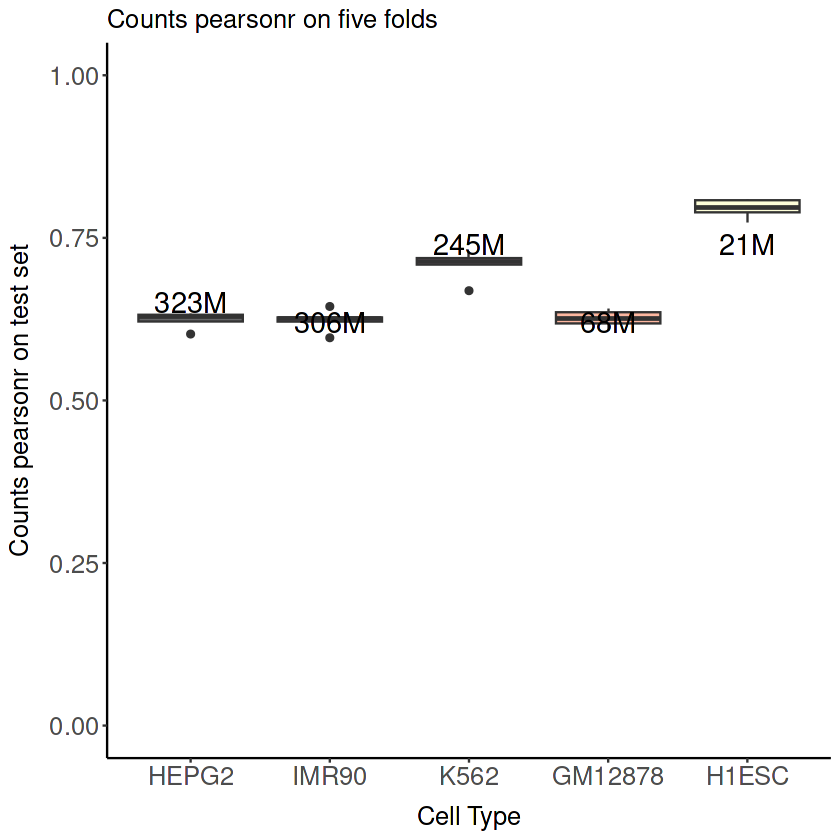

In [21]:
# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=counts_pearsonr_in_peaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.65, label="323M", size=6)+
    annotate("text", x=2, y=0.62, label="306M", size=6)+
    annotate("text", x=3, y=0.74, label="245M", size=6)+
    annotate("text", x=4, y=0.62, label="68M", size=6)+
    annotate("text", x=5, y=0.74, label="21M", size=6)+

    ggtitle("Counts pearsonr on five folds") +
    xlab("Cell Type") + 
    ylab("Counts pearsonr on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    )  +
    ylim(0, 1)


ggsave(file.path("figure_1_supp", paste(dataset,"_counts_pearsonr_peaks.pdf", sep="")), dpi=300, device="pdf")

Saving 7 x 7 in image


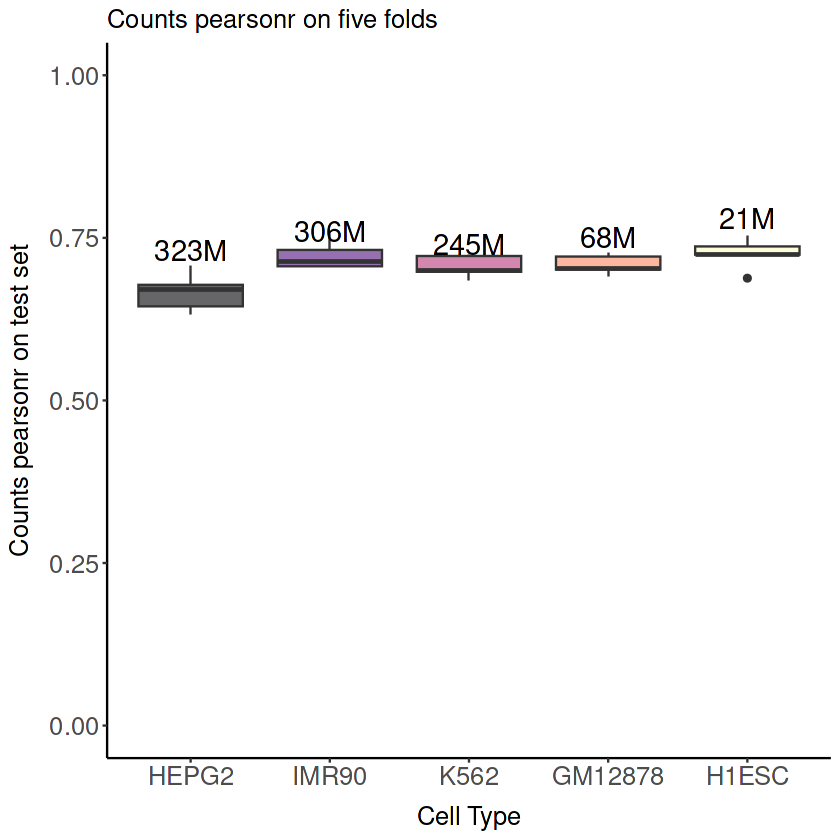

In [22]:
# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=counts_pearsonr_in_peaks_nonpeaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.73, label="323M", size=6)+
    annotate("text", x=2, y=0.76, label="306M", size=6)+
    annotate("text", x=3, y=0.74, label="245M", size=6)+
    annotate("text", x=4, y=0.75, label="68M", size=6)+
    annotate("text", x=5, y=0.78, label="21M", size=6)+

    ggtitle("Counts pearsonr on five folds") +
    xlab("Cell Type") + 
    ylab("Counts pearsonr on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) +
    ylim(0, 1)


ggsave(file.path("figure_1_supp", paste(dataset,"_counts_pearsonr_peaks_nonpeaks.pdf", sep="")), dpi=300, device="pdf")

Saving 7 x 7 in image


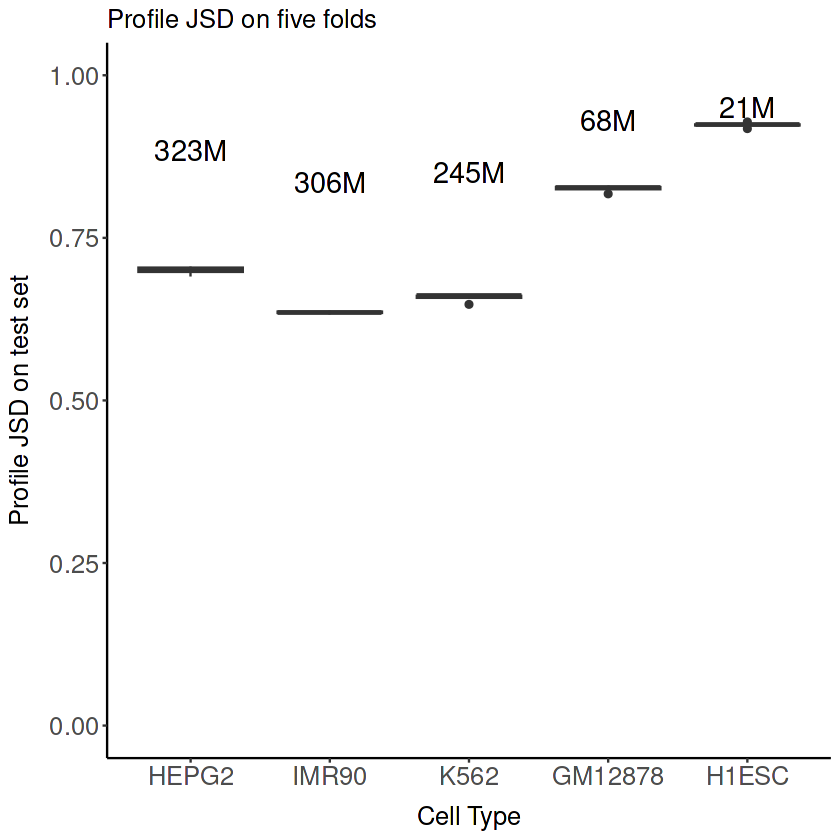

In [23]:

# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=profile_jsd_in_peaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.885, label="323M", size=6)+
    annotate("text", x=2, y=0.835, label="306M", size=6)+
    annotate("text", x=3, y=0.85, label="245M", size=6)+
    annotate("text", x=4, y=0.93, label="68M", size=6)+
    annotate("text", x=5, y=0.95, label="21M", size=6)+
    ggtitle("Profile JSD on five folds") +
    xlab("Cell Type") + 
    ylab("Profile JSD on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) +
    ylim(0, 1)


ggsave(file.path("figure_1_supp", paste(dataset,"_profile_jsd_peaks_log2_perf_improve.pdf", sep="")), dpi=300, device="pdf")

Saving 7 x 7 in image


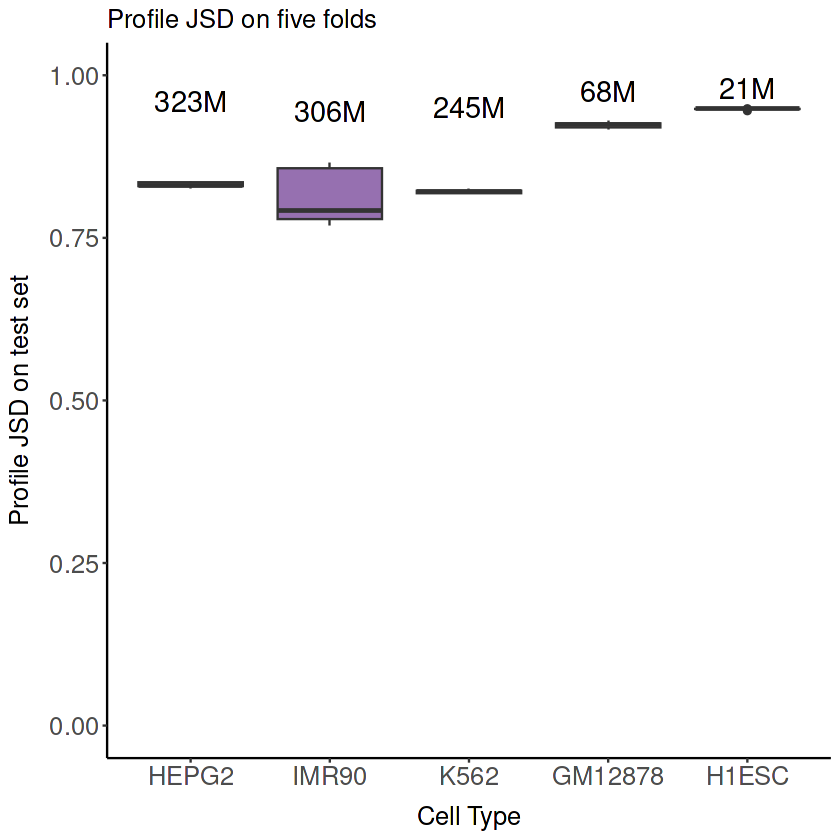

In [24]:

# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=profile_jsd_in_peaks_nonpeaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.96, label="323M", size=6)+
    annotate("text", x=2, y=0.945, label="306M", size=6)+
    annotate("text", x=3, y=0.95, label="245M", size=6)+
    annotate("text", x=4, y=0.975, label="68M", size=6)+
    annotate("text", x=5, y=0.98, label="21M", size=6)+

    ggtitle("Profile JSD on five folds") +
    xlab("Cell Type") + 
    ylab("Profile JSD on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) +
    ylim(0, 1)


ggsave(file.path("figure_1_supp", paste(dataset,"_profile_jsd_log2_peaks_nonpeaks.pdf", sep="")), dpi=300, device="pdf")